<a href="https://colab.research.google.com/github/Natasha617/-advanced-machine-learning/blob/main/clustering_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


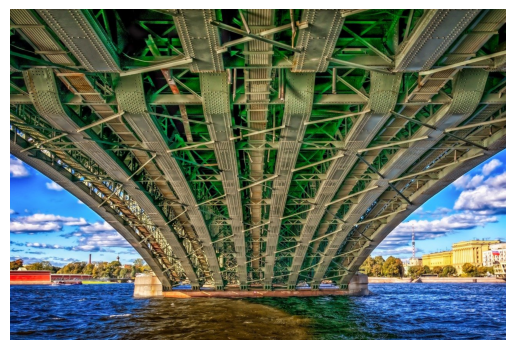

In [27]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
# Путь к изображению
img_path = '/content/drive/MyDrive/magamed/introduction ML/Clustering/spb_bridge.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [28]:
np.mean(img)

90.6989876416569

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [29]:
img = img / 255

In [30]:
np.mean(img)

0.35568230447708576

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [31]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [32]:
img.reshape(-1,3)

array([[0.32156863, 0.28235294, 0.17647059],
       [0.51764706, 0.48235294, 0.36862745],
       [0.51372549, 0.47843137, 0.36470588],
       ...,
       [0.09803922, 0.23529412, 0.48627451],
       [0.03137255, 0.15294118, 0.40392157],
       [0.        , 0.09019608, 0.34117647]])

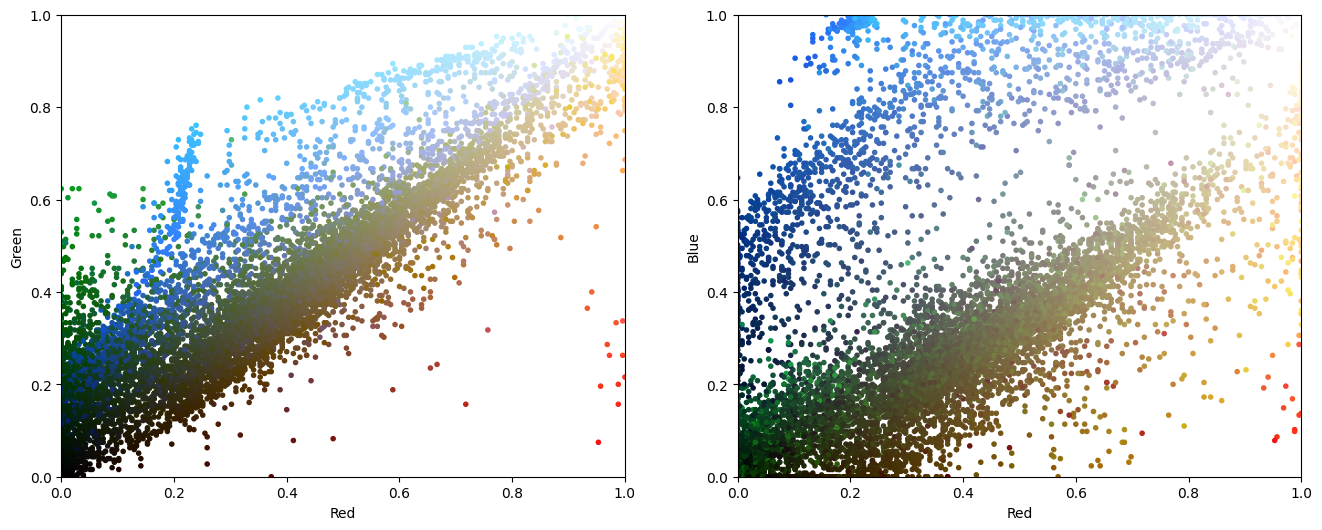

In [33]:
plot_pixels(img.reshape(-1,3))

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [34]:
from sklearn.cluster import MiniBatchKMeans

In [35]:
img.reshape(-1,3)

array([[0.32156863, 0.28235294, 0.17647059],
       [0.51764706, 0.48235294, 0.36862745],
       [0.51372549, 0.47843137, 0.36470588],
       ...,
       [0.09803922, 0.23529412, 0.48627451],
       [0.03137255, 0.15294118, 0.40392157],
       [0.        , 0.09019608, 0.34117647]])

In [36]:
img.reshape(-1,3)


array([[0.32156863, 0.28235294, 0.17647059],
       [0.51764706, 0.48235294, 0.36862745],
       [0.51372549, 0.47843137, 0.36470588],
       ...,
       [0.09803922, 0.23529412, 0.48627451],
       [0.03137255, 0.15294118, 0.40392157],
       [0.        , 0.09019608, 0.34117647]])

In [37]:
m = MiniBatchKMeans(n_clusters=16, random_state=16).fit(img.reshape(-1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Вычислите среднее значение интенсивности пикселей полученного изображения.

In [38]:
imgcopy = img.copy()

In [42]:
for i in range(img.shape[0]):
  for g in range(img.shape[1]):
    pred = m.predict((img[i][g]).reshape(1, -1))
    img[i][g] = m.cluster_centers_[pred]


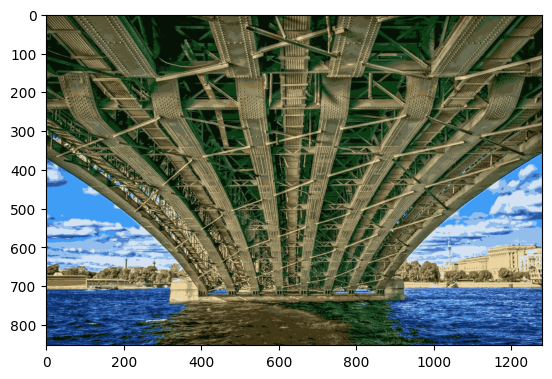

In [43]:
plt.imshow(img)

In [44]:
np.mean(img)

0.35640892445966915

Выберите номер изображения, соответствующего палитре из $16$ цветов.

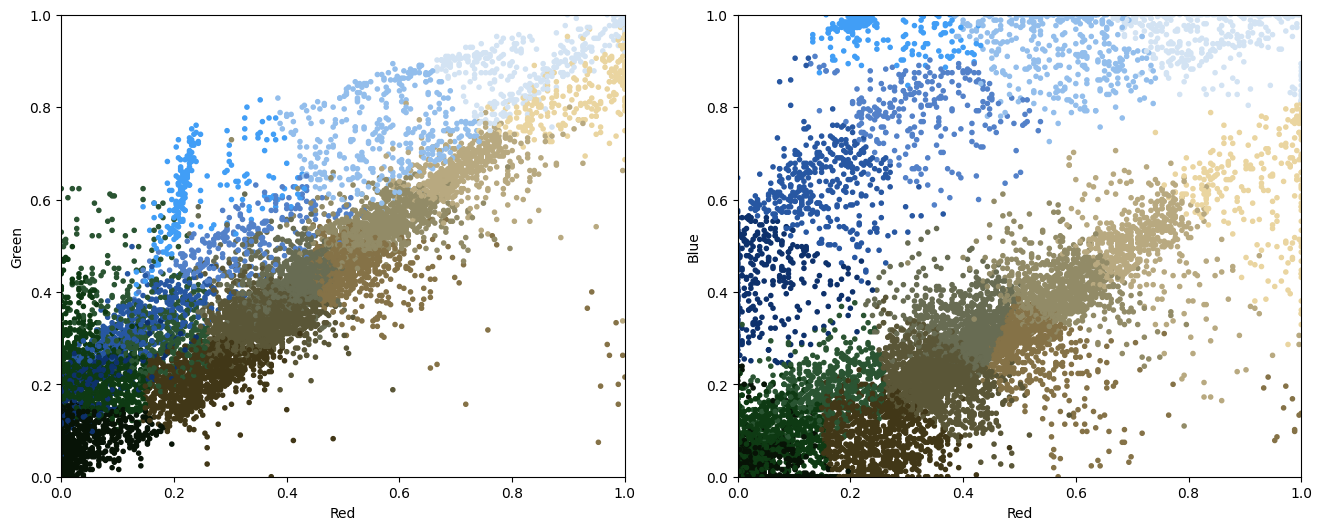

In [47]:
plot_pixels(imgcopy.reshape(-1,3),colors=img.reshape(-1,3))

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

In [ ]:
# < ENTER YOUR CODE HERE >

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

In [ ]:
m.cluster_centers_

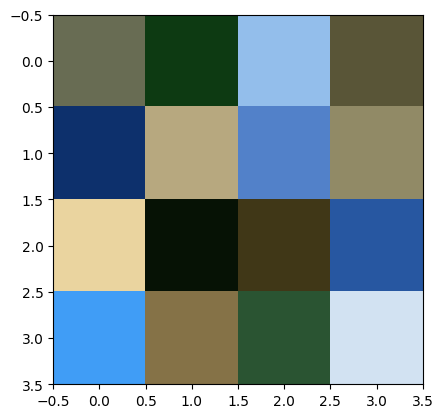

In [50]:
plt.imshow(m.cluster_centers_.reshape(4,4,3))